In [71]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns

# !pip install apyori
# from apyori import apriori

from mlxtend.preprocessing import TransactionEncoder

In [73]:
data = pd.read_csv('/content/gdrive/My Drive/DATASET_THESIS_UNDERGRAD/PUBLIC_PRIVATE_DATA_SPLIT_PRIVATE.csv')

df = data
df.head()
df

,PHQ_Minimal_Depression,PHQ_Mild_Depression,PHQ_Moderate_Depression,PHQ_Moderately_Severe_Depression,PHQ_Severe_Depression,Male,Female,Family_Residence,Hostel_Residence,Relative_Residence,In_a_Relationship,Single,Complicated_Relationship,No_Friend,Minimal_Friends,Group_Of_Friends,Multiple_Group_Of_Friends,Rare_Social_Interaction,Weekly_Social_Interaction,Daily_Social_Interaction,Self_Chosen_Subject,Subject_by_Merit_Position,Subject_by_Family_Pressure,Likes_University_Subject,Dislikes_University_Subject,Dissatisfied_With_University_Facilities,Faced_Session_Jam,No_Tuition_Fee_Struggle,Extreme_Tuition_Fee_Struggle,Moderate_Tuition_Fee_Struggle,Bullied_as_as_Freshman,Bullied_Often,Not_Bullied,No_Sexual_Harrassment,Indirect_Sexual_Harrassment,Direct_Sexual_Harrassment,Age_20-22,Age_22-24,Age_24+,Gadget_Usage_0-5,Gadget_Usage_5-10,Gadget_Usage_10-15,Gadget_Usage_15-20,Gadget_Usage_20+,Social_Media_Usage_0-5,Social_Media_Usage_5-10,Social_Media_Usage_10-15,Social_Media_Usage_15-20,Social_Media_Usage_20+,Study_Hour_0-5,Study_Hour_5-10,Study_Hour_10-15,Study_Hour_15-20,Regular_Smoker,Irregular_Smoker,Non_Smoker,Drug_Intake,Good_Familial_Relationship,Bad_Familial_Relationship,University_Subject_Less_Criticised,University_Subject_Moderately_Criticised,University_Subject_Frequently_Criticised,Low_Academic_Stress,Moderate_Academic_Stress,High_Academic_Stress,Less_Cooperative_Faculties,Moderate_Cooperative_Faculties,Very_Cooperative_Faculties,Less_Cooperative_Classmates,Moderate_Cooperative_Classmates,Very_Cooperative_Classmates,Low_Extra_Curricular_Involvement,Moderate_Extra_Curricular_Involvement,High_Extra_Curricular_Involvement,Urban,Rural,University_inside_Dhaka,University_out_of_Dhaka
0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0
1050,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
1051,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0
1052,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0


In [74]:
df.drop(['Likes_University_Subject', 'No_Tuition_Fee_Struggle', 'Not_Bullied', 'No_Sexual_Harrassment', 'Good_Familial_Relationship', 'University_Subject_Less_Criticised', 'Low_Academic_Stress', 'Very_Cooperative_Faculties', 'Very_Cooperative_Classmates', 'Male','Female','Age_20-22', 'Age_22-24', 'Age_24+', 'Indirect_Sexual_Harrassment', 'Direct_Sexual_Harrassment'], axis=1, inplace=True)

In [75]:
df

,PHQ_Minimal_Depression,PHQ_Mild_Depression,PHQ_Moderate_Depression,PHQ_Moderately_Severe_Depression,PHQ_Severe_Depression,Family_Residence,Hostel_Residence,Relative_Residence,In_a_Relationship,Single,Complicated_Relationship,No_Friend,Minimal_Friends,Group_Of_Friends,Multiple_Group_Of_Friends,Rare_Social_Interaction,Weekly_Social_Interaction,Daily_Social_Interaction,Self_Chosen_Subject,Subject_by_Merit_Position,Subject_by_Family_Pressure,Dislikes_University_Subject,Dissatisfied_With_University_Facilities,Faced_Session_Jam,Extreme_Tuition_Fee_Struggle,Moderate_Tuition_Fee_Struggle,Bullied_as_as_Freshman,Bullied_Often,Gadget_Usage_0-5,Gadget_Usage_5-10,Gadget_Usage_10-15,Gadget_Usage_15-20,Gadget_Usage_20+,Social_Media_Usage_0-5,Social_Media_Usage_5-10,Social_Media_Usage_10-15,Social_Media_Usage_15-20,Social_Media_Usage_20+,Study_Hour_0-5,Study_Hour_5-10,Study_Hour_10-15,Study_Hour_15-20,Regular_Smoker,Irregular_Smoker,Non_Smoker,Drug_Intake,Bad_Familial_Relationship,University_Subject_Moderately_Criticised,University_Subject_Frequently_Criticised,Moderate_Academic_Stress,High_Academic_Stress,Less_Cooperative_Faculties,Moderate_Cooperative_Faculties,Less_Cooperative_Classmates,Moderate_Cooperative_Classmates,Low_Extra_Curricular_Involvement,Moderate_Extra_Curricular_Involvement,High_Extra_Curricular_Involvement,Urban,Rural,University_inside_Dhaka,University_out_of_Dhaka
0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0
1050,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
1051,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0
1052,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0


In [76]:
from mlxtend.frequent_patterns import apriori

fritems = apriori(df, min_support=0.05, use_colnames=True)
fritems

,support,itemsets
0,0.074004,(PHQ_Minimal_Depression)
1,0.247628,(PHQ_Mild_Depression)
2,0.276091,(PHQ_Moderate_Depression)
3,0.189753,(PHQ_Moderately_Severe_Depression)
4,0.212524,(PHQ_Severe_Depression)
...,...,...
56358,0.053131,"(Study_Hour_0-5, Single, Non_Smoker, Urban, Hi..."
56359,0.053131,"(Study_Hour_0-5, Single, Non_Smoker, Urban, Hi..."
56360,0.061670,"(Study_Hour_0-5, Single, Non_Smoker, Urban, Hi..."
56361,0.065465,"(Study_Hour_0-5, Non_Smoker, Urban, High_Acade..."


In [77]:
# fritems['length'] = fritems['itemsets'].apply(lambda x: len(x))
# fritems

In [137]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(fritems, metric='confidence', min_threshold=0.3)

In [138]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PHQ_Minimal_Depression),(Family_Residence),0.074004,0.885199,0.069260,0.935897,1.057273,0.003752,1.790892
1,(PHQ_Minimal_Depression),(Self_Chosen_Subject),0.074004,0.801708,0.066414,0.897436,1.119405,0.007084,1.933349
2,(PHQ_Minimal_Depression),(Social_Media_Usage_0-5),0.074004,0.666034,0.058824,0.794872,1.193440,0.009534,1.628083
3,(PHQ_Minimal_Depression),(Study_Hour_0-5),0.074004,0.833017,0.070209,0.948718,1.138894,0.008562,3.256167
4,(PHQ_Minimal_Depression),(High_Academic_Stress),0.074004,0.858634,0.055028,0.743590,0.866015,-0.008514,0.551328
...,...,...,...,...,...,...,...,...,...
1567666,"(Self_Chosen_Subject, Low_Extra_Curricular_Inv...","(Study_Hour_0-5, Non_Smoker, Urban, High_Acade...",0.134725,0.292220,0.051233,0.380282,1.301354,0.011864,1.142099
1567667,"(Low_Extra_Curricular_Involvement, Family_Resi...","(Study_Hour_0-5, Non_Smoker, Urban, High_Acade...",0.159393,0.252372,0.051233,0.321429,1.273631,0.011007,1.101768
1567668,"(Self_Chosen_Subject, Low_Extra_Curricular_Inv...","(Study_Hour_0-5, Non_Smoker, Urban, High_Acade...",0.169829,0.215370,0.051233,0.301676,1.400733,0.014657,1.123590
1567669,"(Low_Extra_Curricular_Involvement, Non_Smoker,...","(Study_Hour_0-5, Urban, High_Academic_Stress, ...",0.166034,0.217268,0.051233,0.308571,1.420237,0.015160,1.132051


In [141]:
minimal = pd.DataFrame(res[ res['antecedents'] == {'PHQ_Minimal_Depression'}].head(7))
minimal.drop(columns={'antecedent support', 'consequent support', 'leverage', 'conviction'}, inplace=True)
minimal["antecedents"] = minimal["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
minimal["consequents"] = minimal["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
minimal.rename(columns={'antecedents':''}, inplace=True)
minimal

,,consequents,support,confidence,lift
0,PHQ_Minimal_Depression,Family_Residence,0.069260,0.935897,1.057273
1,PHQ_Minimal_Depression,Self_Chosen_Subject,0.066414,0.897436,1.119405
2,PHQ_Minimal_Depression,Social_Media_Usage_0-5,0.058824,0.794872,1.193440
3,PHQ_Minimal_Depression,Study_Hour_0-5,0.070209,0.948718,1.138894
4,PHQ_Minimal_Depression,High_Academic_Stress,0.055028,0.743590,0.866015
5,PHQ_Minimal_Depression,Urban,0.066414,0.897436,1.058051
6,PHQ_Minimal_Depression,University_inside_Dhaka,0.072106,0.974359,1.063120


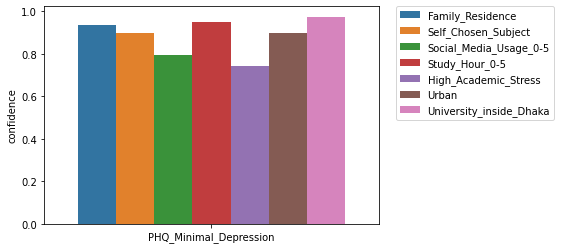

In [152]:
minimal_plot = sns.barplot(x="", y="confidence",hue="consequents", data=minimal)
minimal_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
minimal.plot

In [148]:
mild = pd.DataFrame(res[ res['antecedents'] == {'PHQ_Mild_Depression'}].head(20))
mild.drop(columns={'antecedent support', 'consequent support', 'leverage', 'conviction'}, inplace=True)
mild["antecedents"] = mild["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
mild["consequents"] = mild["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
mild.rename(columns={'antecedents':''}, inplace=True)
mild

,,consequents,support,confidence,lift
7,PHQ_Mild_Depression,Family_Residence,0.233397,0.942529,1.064765
8,PHQ_Mild_Depression,In_a_Relationship,0.084440,0.340996,0.976658
9,PHQ_Mild_Depression,Single,0.151803,0.613027,1.075092
10,PHQ_Mild_Depression,Group_Of_Friends,0.104364,0.421456,1.105011
11,PHQ_Mild_Depression,Rare_Social_Interaction,0.146110,0.590038,0.985579
12,PHQ_Mild_Depression,Self_Chosen_Subject,0.223909,0.904215,1.127861
13,PHQ_Mild_Depression,Moderate_Tuition_Fee_Struggle,0.092030,0.371648,0.972001
15,PHQ_Mild_Depression,Gadget_Usage_5-10,0.111954,0.452107,1.498494
16,PHQ_Mild_Depression,Gadget_Usage_10-15,0.094877,0.383142,0.746454
17,PHQ_Mild_Depression,Social_Media_Usage_0-5,0.194497,0.785441,1.179280


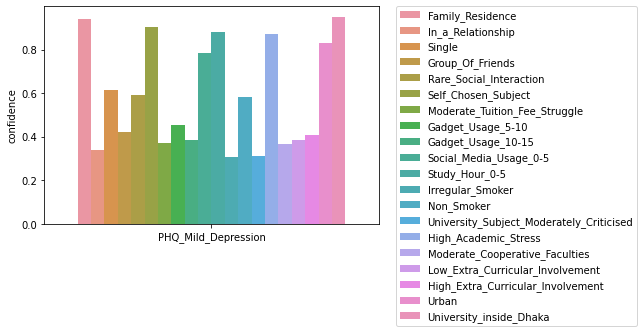

In [154]:
mild_plot = sns.barplot(x="", y="confidence",hue="consequents", data=mild)
mild_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
mild.plot

In [155]:
moderate = res[ res['antecedents'] == {'PHQ_Moderate_Depression'}].head(12)
moderate.drop(columns={'antecedent support', 'consequent support', 'leverage', 'conviction'}, inplace=True)
moderate["antecedents"] = moderate["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
moderate["consequents"] = moderate["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
moderate.rename(columns={'antecedents':''}, inplace=True)
moderate

,,consequents,support,confidence,lift
29,PHQ_Moderate_Depression,Family_Residence,0.256167,0.927835,1.048165
30,PHQ_Moderate_Depression,Single,0.171727,0.621993,1.090817
32,PHQ_Moderate_Depression,Group_Of_Friends,0.114801,0.415808,1.090202
34,PHQ_Moderate_Depression,Rare_Social_Interaction,0.162239,0.587629,0.981554
35,PHQ_Moderate_Depression,Self_Chosen_Subject,0.233397,0.845361,1.054450
36,PHQ_Moderate_Depression,Dissatisfied_With_University_Facilities,0.089184,0.323024,1.013296
38,PHQ_Moderate_Depression,Moderate_Tuition_Fee_Struggle,0.117647,0.426117,1.114459
39,PHQ_Moderate_Depression,Gadget_Usage_10-15,0.152751,0.553265,1.077894
40,PHQ_Moderate_Depression,Social_Media_Usage_0-5,0.214421,0.776632,1.166055
42,PHQ_Moderate_Depression,Study_Hour_0-5,0.242884,0.879725,1.056071


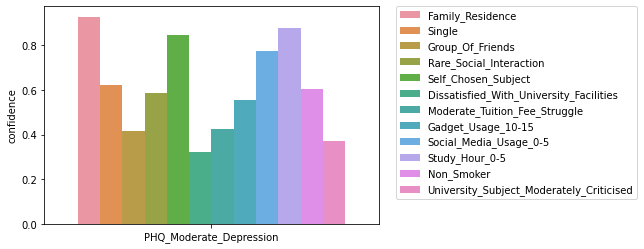

In [156]:
moderate_plot = sns.barplot(x="", y="confidence",hue="consequents", data=moderate)
moderate_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
moderate_plot

In [157]:
moderately_severe = res[ res['antecedents'] == {'PHQ_Moderately_Severe_Depression'} ].head(8)
moderately_severe.drop(columns={'antecedent support', 'consequent support', 'leverage', 'conviction'}, inplace=True)
moderately_severe["antecedents"] = moderately_severe["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
moderately_severe["consequents"] = moderately_severe["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
moderately_severe.rename(columns={'antecedents':''}, inplace=True)
moderately_severe

,,consequents,support,confidence,lift
56,PHQ_Moderately_Severe_Depression,Family_Residence,0.152751,0.805,0.909400
57,PHQ_Moderately_Severe_Depression,In_a_Relationship,0.078748,0.415,1.188614
58,PHQ_Moderately_Severe_Depression,Single,0.087287,0.460,0.806722
59,PHQ_Moderately_Severe_Depression,Minimal_Friends,0.074004,0.390,1.347738
60,PHQ_Moderately_Severe_Depression,Group_Of_Friends,0.061670,0.325,0.852114
61,PHQ_Moderately_Severe_Depression,Rare_Social_Interaction,0.102467,0.540,0.901997
62,PHQ_Moderately_Severe_Depression,Weekly_Social_Interaction,0.068311,0.360,1.220064
63,PHQ_Moderately_Severe_Depression,Self_Chosen_Subject,0.133776,0.705,0.879373


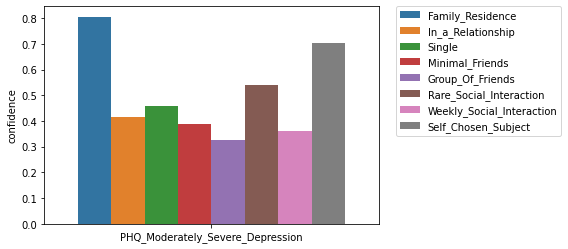

In [158]:
moderately_severe_plot = sns.barplot(x="", y="confidence",hue="consequents", data=moderately_severe)
moderately_severe_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
moderately_severe_plot

In [160]:
severe = res[ res['antecedents'] == {'PHQ_Severe_Depression'} ].head(11)
severe.drop(columns={'antecedent support', 'consequent support', 'leverage', 'conviction'}, inplace=True)
severe["antecedents"] = severe["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
severe["consequents"] = severe["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
severe.rename(columns={'antecedents':''}, inplace=True)
severe

,,consequents,support,confidence,lift
86,PHQ_Severe_Depression,Family_Residence,0.173624,0.816964,0.922916
87,PHQ_Severe_Depression,In_a_Relationship,0.070209,0.330357,0.946186
88,PHQ_Severe_Depression,Single,0.119545,0.562500,0.986481
89,PHQ_Severe_Depression,Minimal_Friends,0.080645,0.379464,1.311329
90,PHQ_Severe_Depression,Rare_Social_Interaction,0.139469,0.656250,1.096177
91,PHQ_Severe_Depression,Self_Chosen_Subject,0.144213,0.678571,0.846407
93,PHQ_Severe_Depression,Dissatisfied_With_University_Facilities,0.080645,0.379464,1.190343
94,PHQ_Severe_Depression,Faced_Session_Jam,0.064516,0.303571,2.037989
96,PHQ_Severe_Depression,Extreme_Tuition_Fee_Struggle,0.078748,0.370536,1.125489
97,PHQ_Severe_Depression,Moderate_Tuition_Fee_Struggle,0.085389,0.401786,1.050824


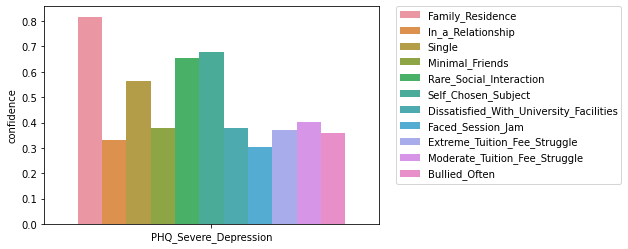

In [161]:
severe_plot = sns.barplot(x="", y="confidence",hue="consequents", data=severe)
severe_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
severe_plot